<a href="https://colab.research.google.com/github/ilmondovero/sf/blob/main/ADM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


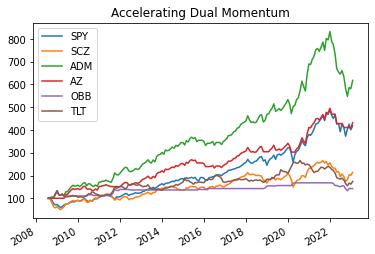

In [5]:
!pip install tiingo
"""
Created on Fri Jun 11 10:03:30 2018
@author: Dario Marinelli
"""
from tiingo import TiingoClient #pip install tiingo se manca il pacchetto su anaconda
import pandas as pd
capital=100000
config = {}
config['session'] = True
config['api_key'] = "fbb82277db40c7a1924d0a5bcf1d563bd21323cd"
client = TiingoClient(config)
capitale=100000#capitale iniziale
df=client.get_dataframe(["SPY","SCZ","TLT"],frequency='monthly',metric_name='adjClose',startDate='2007-01-01')#scarico i dati
df_az=df[["SPY","SCZ"]].copy()#copio i dati azionari in un dataframe
df_ob=df["TLT"].copy()#copio i dati obbligazionari in un dataframe
df_az_momentum=(df_az.pct_change()+df_az.pct_change(3)+df_az.pct_change(6)).shift().dropna()#calcolo il momentum a 1,3,6 mesi
df_az_rank=df_az_momentum.rank(axis=1,ascending=False).applymap(lambda x:0 if x>1 else 1)#faccio la classifica per vedere il più forte
df_azionario=(df_az_momentum>0).sum(axis=1).apply(lambda x:1 if x>=1 else 0)#applico il segnale all'azionario
df_obbligazionario=df_azionario.apply(lambda x:1 if x==0 else 0)#applico il segnale opposto all'obbligazionario
df_rendimento_az=((df_az_rank*df_az.pct_change()).sum(axis=1)*df_azionario)
df_rendimento_ob=(df_ob.pct_change()*df_obbligazionario).dropna()#sommo i rendimenti tra azionario e obbligazionario
df_az["ADM"]=((1+(df_rendimento_az+df_rendimento_ob)).cumprod()-1)*capitale+capitale#faccio la produttoria dei rendimenti sui soldi
df_az["AZ"]=((1+(df_rendimento_az)).cumprod()-1)*capitale+capitale
df_az["OBB"]=((1+(df_rendimento_ob)).cumprod()-1)*capitale+capitale
df_az["TLT"]=((1+(df_ob.pct_change())).cumprod()-1)*capitale+capitale
df_az.dropna(inplace=True)#cancello i dati mancanti
df_az=(df_az/df_az.iloc[0])*100#normalizzo a 100
df_az.plot(use_index=True,legend=True,title="Accelerating Dual Momentum")#Plotto la Equity